In [2]:
import pandas as pd
# Data importation
 # check and correct csv errors before importing
        # concatenation and shifting of a column to the left of cells with data surrounded by " ".
        # modification of "," in "." in population file
        # removal of "<0.1" data in the undernutrition file to have only numeric data
        # addition of ISO3 codes for each country in tables
aideAlimentaire = pd.read_csv("/home/benjabell/Bureau/formation/P4/Projet/aide_alimentaire.csv")
dispoAlimentaire = pd.read_csv("/home/benjabell/Bureau/formation/P4/Projet/dispo_alimentaire.csv")
sousNutrition = pd.read_csv("/home/benjabell/Bureau/formation/P4/Projet/sous_nutrition.csv")
population = pd.read_csv("/home/benjabell/Bureau/formation/P4/Projet/population.csv")
latlong = pd.read_csv("/home/benjabell/Bureau/formation/P4/Projet/average-latitude-longitude-countries.csv")
compo = pd.read_csv("/home/benjabell/Bureau/formation/P4/Projet/Table-composition-aliments.csv")
compovege = pd.read_csv("/home/benjabell/Bureau/formation/P4/Projet/Table-composition-aliments-végé.csv")

In [3]:
# Request 1 > the proportion of undernourished people in 2017 (p = n / N)

propSousNut2017 =  pd.merge(population, sousNutrition, on='Code')
propSousNut2017 = propSousNut2017.query("Année_x == 2017")
propSousNut2017 = propSousNut2017.query("Année_y == '2016-2018'")

# population in thousands, undernutrition in millions > ratio = pop/(undernutrition*1000)
propSousNut2017 = ((propSousNut2017['Valeur_y'].sum())/(propSousNut2017['Valeur_x'].sum())*1000)*100
print("In 2017, the proportion of undernourished people was %s" % round(propSousNut2017, 2), '%')

En 2017 la proportion de personnes en état de sous-nutrition est de 7.1 %


In [4]:
# Request 2 > the theoretical number of people who could be fed (with internal availability)
 
gbDispoAlim = dispoAlimentaire.groupby('Code')
    # sum of food availability by country
sommeDispoPays = gbDispoAlim['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
    # population of each country in 2017
population2017 = population.query("Année == 2017")
    # food supply per country (in thousands) * country's population = country's kcal supply per day
        # average daily requirement per person = 2000 kcal (source WHO)
dfDispo = pd.merge(population2017, sommeDispoPays, on='Code')
dispoKcal = (dfDispo['Valeur']*1000*dfDispo['Disponibilité alimentaire (Kcal/personne/jour)']/2000)
    # total sum 
print("In 2017 we could theoretically feed %s billion people \n" % round((dispoKcal.sum())/1000000000, 2))

En 2017 nous pouvions théoriquement nourrir 10.59 milliards de personnes 



In [5]:
# request 3 > same request for food availability of plant products

    # restriction on plant origin
dispoVege = dispoAlimentaire[dispoAlimentaire['Origine'].str.contains("vegetale")]
    # sum of food availability by country
gbDispoVege = dispoVege.groupby('Code')
sommeDispoPaysVege = gbDispoVege['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
    # food supply per country (in thousands) * country's population = country's kcal supply
        # average daily requirement per person = 2000 kcal (source WHO)
dfDispoVege = pd.merge(population2017, sommeDispoPaysVege, on='Code')
dispoKcalVege = (dfDispoVege['Valeur']*1000*dfDispoVege['Disponibilité alimentaire (Kcal/personne/jour)']/2000)/1000000000
    # total sum
print("And %s billion people on plant products alone" % round(dispoKcalVege.sum(), 2))
# calculate ratios rather than world population
print("While the world\'s population was %s billion" % round((population2017['Valeur']/1000000).sum(),2))

Et 8.72 milliards de personnes rien qu'avec des produits végétaux
Alors que la population mondiale était de 7.55 milliards d'habitants


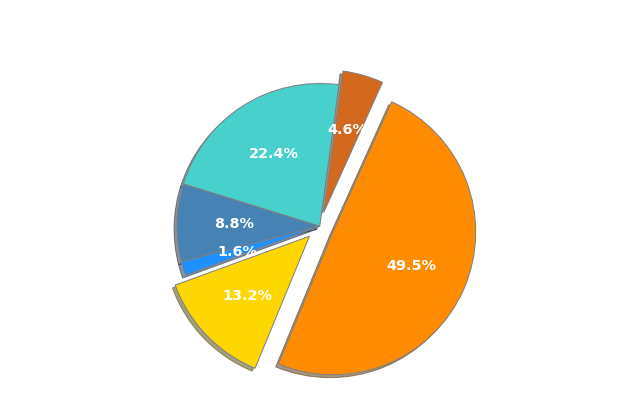

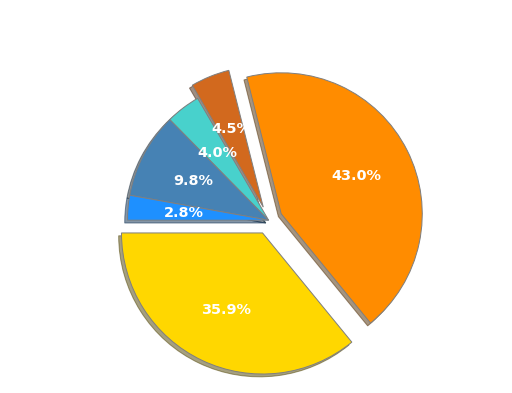

In [6]:
# request 4 > use of domestic availability, 
# in particular the share allocated to animal feed, 
# that which is lost and 
# that which is actually used for human consumption. 

import matplotlib.pyplot as plt

# sum of internal availability 
dispoTotale = dispoAlimentaire.sum()

# select the data to be displayed in the graph
labels = 'Aliments pour animaux', 'Nourriture', 'Pertes', 'Autres Utilisations', 'Semences', 'Traitement'
valeurs = [dispoTotale['Aliments pour animaux'], dispoTotale['Nourriture'], dispoTotale['Pertes'], 
           dispoTotale['Traitement'], dispoTotale['Autres Utilisations'], dispoTotale['Semences']]
colors = ['gold','darkorange', 'chocolate', 'mediumturquoise','steelblue','dodgerblue']
explode = (0.1,0.1,0.1,0,0,0) # highlights the requested fields

# graph formatting
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(valeurs, labels=labels, colors=colors, autopct='%0.1f%%', shadow=True, startangle=200, explode=explode, \
       textprops = {'size': 'x-large', 'color':'white', 'weight':'bold'}, \
        wedgeprops={'linewidth': 1.0, 'edgecolor': 'grey'},)

plt.title("Disponibilités intérieures mondiales",fontsize=30, pad=30, weight='bold', color='white')
plt.axis('equal')
plt.show()

# request bis with focus on cereals

# nomenclature issues on 2017 cereal data (using 2013 nomenclature): 
# 'Avoine', 'Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Seigle', 'Sorgho' 
# au lieu de : 'Avoine', 'Blé et produits', 'Céréales, Autres', 'Maïs et produits', 'Millet et produits',
# 'Orge et produits', 'Riz et produits', 'Seigle et produits', 'Sorgho et produits'

# food availability filter on cereals with 2013 list
liste_cereale = ['Blé', 'Céréales, Autres', 'Maïs', 'Millet','Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Sorgho','Seigle']
dispoCereales = dispoAlimentaire[dispoAlimentaire["Produit"].isin(liste_cereale)].sum()

# select the data to be displayed in the graph
labels = 'Aliments pour animaux', 'Nourriture', 'Pertes', 'Autres Utilisations', 'Semences', 'Traitement'
valeurs = [dispoCereales['Aliments pour animaux'], dispoCereales['Nourriture'], dispoCereales['Pertes'], 
           dispoCereales['Traitement'], dispoCereales['Autres Utilisations'], dispoCereales['Semences']]
colors = ['gold','darkorange', 'chocolate', 'mediumturquoise','steelblue','dodgerblue']
explode = (0.1,0.1,0.1,0,0,0) # fait ressortir les champs demandés


# graph formatting
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(valeurs, labels=labels, colors=colors, autopct='%0.1f%%', shadow=True, startangle=180, explode=explode, \
       textprops = {'size': 'x-large', 'color':'white', 'weight':'bold'}, \
        wedgeprops={'linewidth': 1.0, 'edgecolor': 'grey'},)

plt.title("Focus on cereals",fontsize=30, pad=30, weight='bold', color='white')
plt.axis('equal')
plt.show()

In [7]:
# request 5 > countries with the highest proportion of undernourished people in 2017
# data restricted to 2017
sousNutAnnee = sousNutrition.query("Année == '2016-2018'")
# merging the two tables
mg2017 = pd.merge(sousNutAnnee, population2017, on='Code')
# calculating the proportion by country
prop2017 = round(((mg2017['Valeur_x']*1000000)/(mg2017['Valeur_y']*1000)*100),2)
# convert type(series) calculation to a DataFrame
dfProp2017 = pd.DataFrame(prop2017, columns=['Proportion sous-nutrition'])
# mg2017 table calculation integration
resultat = mg2017.merge(dfProp2017,left_index=True,right_index=True)
# DataFrame formatting
resultat.drop(columns=["Zone_y","Année_x", "Valeur_x", "Année_y", "Valeur_y"],inplace=True)
# descending sorting and display of the first 10 results
resultat = resultat.sort_values(by = 'Proportion sous-nutrition', ascending = False)
print(resultat.head(10))

# display results on an interactive map
import geopandas
import matplotlib.pyplot as plt
 
# use of dataset geopandas 'naturalearth_lowres'
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename columns to match our data
world.columns = ['Population', 'Continent', 'Pays', 'Code', 'geometry']
# merge with our data
world = pd.merge(world, latlong, on = 'Code')
world = pd.merge(world, population2017, on = 'Code')
world = pd.merge(world, resultat, on = 'Code')

# output formatting
world.drop(['Valeur',
            'Country',
            'Latitude',
            'Longitude',
            'Zone',
            'Année',
            'Continent',
            'Zone_x',
            ], axis=1, inplace=True)


# creation of the interractive map
import folium

m = world.explore(
    column="Proportion sous-nutrition",  # coloring according to the column indicated
    scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=True, # show legend
    k=10, # use 10 bins
    legend_kwds=dict(colorbar=False),# the gradient bar is not used as a caption
    zoom_start=1.5,
)
m# show map

                                         Zone_x Code  \
78                                        Haïti  HTI   
157  République populaire démocratique de Corée  PRK   
108                                  Madagascar  MDG   
103                                     Libéria  LBR   
100                                     Lesotho  LSO   
183                                       Tchad  TCD   
161                                      Rwanda  RWA   
121                                  Mozambique  MOZ   
186                                 Timor-Leste  TLS   
0                                   Afghanistan  AFG   

     Proportion sous-nutrition  
78                       48.26  
157                      47.19  
108                      41.06  
103                      38.28  
100                      38.25  
183                      37.96  
161                      35.06  
121                      32.81  
186                      32.17  
0                        28.93  


In [8]:
# request 6 > countries that have received the most aid since 2013
# grouping by country
gbAideAlim = aideAlimentaire.query("Année >= 2013")
gbAideAlim = gbAideAlim.groupby('Pays bénéficiaire')
sommeAideAlim = gbAideAlim['Valeur'].sum()
# Top 10 countries displayed
print((sommeAideAlim.sort_values(ascending = False)).head(10))

# interractive map result
gbAideAlim = aideAlimentaire.query("Année >= 2013")
gbAideAlim = gbAideAlim.groupby('Code')
sommeAideAlim = gbAideAlim['Valeur'].sum()
# use of dataset geopandas 'naturalearth_lowres'
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename columns to match our data
world.columns = ['pop_est', 'continent', 'Pays', 'Code', 'geometry']
# merge with our data
world = pd.merge(world, latlong, on = 'Code')
world = pd.merge(world, sommeAideAlim, on = 'Code')
world.drop(['pop_est',
            'continent',
            'Country',
            'Code',
            'Latitude',
            'Longitude'
            ], axis=1, inplace=True)
world.columns = ['Pays', 'geometry', 'Total aide alimentaire (en T)']
# interactive map creation
import folium

m = world.explore(
     column="Total aide alimentaire (en T)",  # coloring according to the column indicated
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     legend=True, # show legend
     k=10, # use 10 bins
     legend_kwds=dict(colorbar=False),# the gradient bar is not used as a caption
     zoom_start=1.5,
)

m  # show map

Pays bénéficiaire
République arabe syrienne           1858943
Éthiopie                            1381294
Yémen                               1206484
Soudan du Sud                        695248
Soudan                               669784
Kenya                                552836
Bangladesh                           348188
Somalie                              292678
République démocratique du Congo     288502
Niger                                276344
Name: Valeur, dtype: int64


In [9]:
# countries with the most/least availability/capita,

# 1. if food were better distributed, all populations would have enough to eat
# sum of food availability per country
gbDispoAlim = dispoAlimentaire.groupby(by=['Zone']).sum().groupby(level=[0]).cumsum()
# coverage of daily requirements by country (in %) with 2000 kcal per person / day
gbDispoAlim['Couverture des besoins journaliers (en %)'] = (gbDispoAlim['Disponibilité alimentaire (Kcal/personne/jour)'] / 2000) * 100
# df formatting
gbDispoAlim.drop(['Aliments pour animaux',
                  'Autres Utilisations',
                  'Disponibilité alimentaire en quantité (kg/personne/an)',
                  'Disponibilité de matière grasse en quantité (g/personne/jour)',
                  'Disponibilité de protéines en quantité (g/personne/jour)',
                  'Disponibilité intérieure',
                  'Exportations - Quantité',
                  'Importations - Quantité',
                  'Nourriture',
                  'Pertes',
                  'Production',
                  'Semences',
                  'Traitement',
                  'Variation de stock'
            ], axis=1, inplace=True)
gbDispoAlim = gbDispoAlim.sort_values(by='Couverture des besoins journaliers (en %)', ascending = False)
gbDispoAlim

,Disponibilité alimentaire (Kcal/personne/jour),Couverture des besoins journaliers (en %)
Zone,,
Autriche,3770.0,188.50
Belgique,3737.0,186.85
Turquie,3708.0,185.40
États-Unis d Amérique,3682.0,184.10
Israël,3610.0,180.50
...,...,...
Haïti,2089.0,104.45
Afghanistan,2087.0,104.35
Madagascar,2056.0,102.80


In [10]:
# countries with the most/least availability per capita(map)
gbDispoAlim = dispoAlimentaire.groupby('Code')
# sum of food availability by country
sommeDispoPays = gbDispoAlim['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
# coverage of daily requirements by country (in %) with 2000 kcal per person / day
propDispoPays = (sommeDispoPays / 2000) * 100
# use of dataset geopandas 'naturalearth_lowres'
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename columns to match our data
world.columns = ['pop_est', 'continent', 'Pays', 'Code', 'geometry']
# merge with our data
world = pd.merge(world, latlong, on = 'Code')
world = pd.merge(world, propDispoPays, on = 'Code')
world.drop(['pop_est',
            'continent',
            'Country',
            ], axis=1, inplace=True)

# interactive map creation
m = world.explore(
     column="Disponibilité alimentaire (Kcal/personne/jour)",  # colorisation en fonction de la colonne indiquée
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     legend=True, # show legend
     k=10, # use 10 bins
     legend_kwds=dict(colorbar=False),# on n'utilise pas la barre dégradée en légende
     zoom_start=1.5,
     name='Production mondiale par habitant',
)

m  # show map

In [17]:
# 3. zoom on cassava use in Thailand

# FAO data dictionary: https://www.fao.org/3/X9892F/x9892f03.htm
# calorific intake data: https://www.fao.org/3/X9892E/X9892e05.htm

# data restriction to 2017
sousNutAnnee = sousNutrition.query("Année == '2016-2018'")
dispoThai = dispoAlimentaire.query("Zone == 'Thaïlande'")
maniocThai2017 = dispoThai.query("Produit == 'Manioc'")
# merging the two tables
thai2017 = pd.merge(sousNutAnnee, maniocThai2017, on='Code')
# mise en forme du résultat
thai2017.drop(['Année',
                'Origine',
                'Pertes',
                'Disponibilité alimentaire (Kcal/personne/jour)',
                'Disponibilité alimentaire en quantité (kg/personne/an)',
                'Disponibilité de matière grasse en quantité (g/personne/jour)',
                'Disponibilité de protéines en quantité (g/personne/jour)',
                'Disponibilité intérieure',
                'Variation de stock',
                'Zone_y'
                ], axis=1, inplace=True)

# nutritional value of cassava = 109kcal per 100g > = 1,090,000,000kcal per thousand tonnes
print('Number of people in millions that could be fed with Thai cassava exports')
t = round((((thai2017['Exportations - Quantité']*1090000000)/2000)/356/1000000),2)
print(t)

thai2017

Nombre de personnes en million que l'on pourait nourrir avec les exportations thaïllandaises de manioc
0    38.6
Name: Exportations - Quantité, dtype: float64


,Zone_x,Code,Valeur,Produit,Aliments pour animaux,Autres Utilisations,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Semences,Traitement
0,Thaïlande,THA,6.2,Manioc,1800.0,2081.0,25214.0,1250.0,871.0,30228.0,NaN,0.0


In [18]:
# restriction to unprocessed plant origins to avoid cascading uses
# to avoid the accumulation of cereal production for animals and their production and keep
# only primary products

gdDispo = dispoVege.groupby(['Produit']).sum()
dispoproduit = pd.merge(gdDispo, compovege, on='Produit')

# people fed = (((Calories (100g)*10000000) * Losses) / 2000) / 365
dispoproduit['Personnes nourries (Pertes)'] = (((dispoproduit['Calories (100g)']*10000000)\
                                               *dispoproduit['Pertes'])/2000)/365
dispoproduit['Personnes nourries (Production)'] = (((dispoproduit['Calories (100g)']*10000000)\
                                                   *dispoproduit['Production'])/2000)/365
prod = dispoproduit['Personnes nourries (Production)'].sum()
pertes = dispoproduit['Personnes nourries (Pertes)'].sum()
print("Number of people (in billions) fed by the entire global production of plant-based foods")
print(round(prod/1000000000, 2))
print("Number of people fed (in billions) with all the world\'s plant-based food losses")
print(round(pertes/1000000000, 2))
print("Number of undernourished people (in billions) in 2017")
sousNutAnnee = sousNutrition.query("Année == '2016-2018'")
tt = sousNutAnnee['Valeur'].sum()
print(round(tt/1000, 2))

Nombre de personnes (en milliards) nourries avec l'ensemble de la production mondiale d'aliments d'origine végétale
18.82
Nombre de personnes nourries (en milliards) avec l'ensemble des pertes mondiale d'aliments d'origine végétale
0.9
Nombre de personnes (en milliards) en sous-nutrition en 2017
0.54


In [12]:
# map of total production per inhabitant
gbDispoAlim = dispoAlimentaire.groupby(by=['Code']).sum().groupby(level=[0]).cumsum()

# display results on map
import geopandas
import matplotlib.pyplot as plt
 
# use of dataset geopandas 'naturalearth_lowres'
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename columns to match our data
world.columns = ['pop_est', 'continent', 'Pays', 'Code', 'geometry']
# merge with our data
world = pd.merge(world, latlong, on = 'Code')
pop2017 = population.query("Année == 2017")
world = pd.merge(world, pop2017, on = 'Code')
world = pd.merge(world, gbDispoAlim, on = 'Code')
world['Prod par Habitant'] = round((world['Production']/world['Valeur']),2)
world.drop(['pop_est',
            'continent',
            'Valeur',
            'Code',
            'Country',
            'Latitude',
            'Longitude',
            'Zone',
            'Année',
            'Aliments pour animaux',
            'Autres Utilisations',
            'Importations - Quantité',
            'Disponibilité alimentaire (Kcal/personne/jour)',
            'Disponibilité alimentaire en quantité (kg/personne/an)',
            'Disponibilité de matière grasse en quantité (g/personne/jour)',
            'Disponibilité de protéines en quantité (g/personne/jour)',
            'Disponibilité intérieure',
            'Semences',
            'Traitement',
            'Nourriture',
            'Variation de stock',
            'Exportations - Quantité',
            'Pertes',
            ], axis=1, inplace=True)

# interactive map creation
import folium

m = world.explore(
     column="Prod par Habitant",  # colorisation en fonction de la colonne indiquée
     scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
     legend=True, # show legend
     k=10, # use 10 bins
     legend_kwds=dict(colorbar=False),# on n'utilise pas la barre dégradée en légende
     zoom_start=1.5,
     name='Production mondiale par habitant',
)

m  # show map